## Chapter 8. 차원 축소

### 8.3 Principle Component Analysis

In [1]:
import numpy as np

# 3D 데이터셋 만들기
np.random.seed(2022)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

#### 주성분  
$X=U\Sigma V^T$ 에서 $V$가 주성분  
- (m, m) (m, n) (n, n)  
  
m: 샘플 개수, n: 특성 개수

In [2]:
# numpy의 svd() 함수를 사용해 훈련 세트의 모든 주성분을 구한 후 처음 두 개의 PC를 정의하는 두 개의 단위 벡터를 추출

X_centered = X - X.mean(axis=0) # 데이터셋의 평균을 0이라고 가정, 이를 위한 조정
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [8]:
print(c1)
print(c2)

[-0.93706776 -0.30061123 -0.17758635]
[-0.33926378  0.90412794  0.25971669]


In [4]:
X, X.shape

(array([[ 6.30754908e-01, -4.08913089e-01,  1.43144425e-02],
        [ 2.33095606e-01,  6.53519206e-01,  1.64349882e-01],
        [ 1.12771783e+00,  6.60459422e-02,  2.64916410e-01],
        [ 8.84508040e-01, -2.36300156e-01, -1.73665016e-02],
        [-6.58886688e-01,  2.99735006e-01,  2.98300088e-02],
        [ 2.57510249e-01,  6.81644977e-01,  2.39412548e-01],
        [-1.19185765e+00, -3.59591477e-01, -1.29368460e-01],
        [-6.24984542e-01,  3.98311143e-01,  5.81005814e-02],
        [-1.09374030e+00, -3.73810142e-01, -2.75025836e-01],
        [-8.09509726e-01,  1.59913539e-01,  1.88091369e-02],
        [-1.11046220e+00, -2.03912668e-01, -2.19792465e-01],
        [-1.08627226e+00, -2.53374944e-01, -2.95682645e-01],
        [-1.10222372e+00, -2.23540722e-01, -5.23773636e-02],
        [-1.02331563e+00, -5.19178779e-01, -1.10629237e-01],
        [ 8.53794538e-01,  5.76506177e-01,  3.28249018e-01],
        [ 1.71900236e-01,  7.66790530e-01,  3.23988101e-01],
        [ 8.48586545e-01

In [6]:
X_centered

array([[ 0.61749994, -0.54517804, -0.0291039 ],
       [ 0.21984063,  0.51725426,  0.12093154],
       [ 1.11446286, -0.07021901,  0.22149807],
       [ 0.87125307, -0.3725651 , -0.06078484],
       [-0.67214166,  0.16347006, -0.01358833],
       [ 0.24425528,  0.54538003,  0.19599421],
       [-1.20511262, -0.49585642, -0.1727868 ],
       [-0.63823951,  0.2620462 ,  0.01468224],
       [-1.10699528, -0.51007509, -0.31844418],
       [-0.8227647 ,  0.02364859, -0.0246092 ],
       [-1.12371717, -0.34017762, -0.2632108 ],
       [-1.09952723, -0.38963989, -0.33910098],
       [-1.11547869, -0.35980567, -0.0957957 ],
       [-1.0365706 , -0.65544373, -0.15404758],
       [ 0.84053957,  0.44024123,  0.28483068],
       [ 0.15864526,  0.63052558,  0.28056976],
       [ 0.83533157,  0.47597663,  0.09597206],
       [-0.45368605,  0.30248995, -0.01152236],
       [-0.94713848, -0.77219616, -0.34334312],
       [ 0.97879607, -0.25492046,  0.08067489],
       [-0.98423445, -0.08854026, -0.320

In [3]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [4]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

#### $d$ 차원으로 투영하기

In [16]:
# 첫 두 개의 주성분으로 정의된 평면에 훈련 세트를 투영
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)
X2D_using_svd = X2D

In [10]:
W2

array([[-0.93706776, -0.33926378],
       [-0.30061123,  0.90412794],
       [-0.17758635,  0.25971669]])

In [12]:
X2D, X2D.shape

(array([[-0.40958419, -0.70996482],
        [-0.3829738 ,  0.424488  ],
        [-1.06255362, -0.3840571 ],
        [-0.69363135, -0.64821796],
        [ 0.58311444,  0.37230205],
        [-0.427637  ,  0.46112932],
        [ 1.30901677, -0.0843422 ],
        [ 0.51669227,  0.45726806],
        [ 1.24721522, -0.16831501],
        [ 0.7682475 ,  0.29412419],
        [ 1.20200299,  0.00531221],
        [ 1.20768135, -0.06732473],
        [ 1.17045275,  0.02825141],
        [ 1.19572738, -0.28094285],
        [-0.97056602,  0.18684505],
        [-0.38802979,  0.58912185],
        [-0.94288953,  0.17187157],
        [ 0.33624891,  0.42441631],
        [ 1.18063682, -0.46600628],
        [-0.85489305, -0.54159815],
        [ 1.00578608,  0.17068401],
        [-1.12444379,  0.09933695],
        [-1.05904568,  0.18140177],
        [ 0.95162165,  0.22330137],
        [-0.48944296, -0.6851681 ],
        [-0.33824876,  0.62777891],
        [ 1.16931547,  0.01299358],
        [-0.70492717,  0.288

#### 사이킷런 사용하기

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [21]:
X2D[:5]

array([[-0.40958419,  0.70996482],
       [-0.3829738 , -0.424488  ],
       [-1.06255362,  0.3840571 ],
       [-0.69363135,  0.64821796],
       [ 0.58311444, -0.37230205]])

In [17]:
X2D_using_svd[:5]

array([[-0.40958419, -0.70996482],
       [-0.3829738 ,  0.424488  ],
       [-1.06255362, -0.3840571 ],
       [-0.69363135, -0.64821796],
       [ 0.58311444,  0.37230205]])

In [19]:
np.allclose(X2D, X2D_using_svd)

# 데이터셋을 조금 다르게 해서 PCA를 실행하면 결과가 달라짐 (일반적으로, 일부 축이 반대로 바뀌는 정도)

True

In [23]:
# 평면(PCA 2D 부분 공간)에 투영된 3D 포인트 복원
X3D_inv = pca.inverse_transform(X2D)

In [24]:
# 투영 단계에서 일부 정보를 잃어버리기 때문에 복원된 3D 포인트가 원본 3D 포인트와 완전히 똑같지는 않음
np.allclose(X3D_inv, X)

False

In [25]:
# 재구성 오차 계산
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.00565160257320164

In [26]:
# SVD 방식의 역변환
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])

In [27]:
# 사이킷런의 PCA 클래스는 자동으로 평균을 빼던 것을 복원해주기 때문에 두 방식의 재구성 오차가 동일하지 않음
# 하지만, 평균을 빼면 동일한 재구성을 얻을 수 있음
np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

True

In [29]:
# PCA 객체를 사용해 계산된 주성분
pca.components_

array([[-0.93706776, -0.30061123, -0.17758635],
       [ 0.33926378, -0.90412794, -0.25971669]])

In [30]:
# SVD 방법으로 계산된 처음 두 개의 주성분
Vt[:2]
# 축이 뒤집혀 있음

array([[-0.93706776, -0.30061123, -0.17758635],
       [-0.33926378,  0.90412794,  0.25971669]])

#### 설명된 분산의 비율

In [22]:
# 설명된 분산의 비율 확인
pca.explained_variance_ratio_

array([0.84562375, 0.1486577 ])

In [32]:
# 2D로 투영했기 때문에 분산의 0.5%를 잃음
1 - pca.explained_variance_ratio_.sum()

0.005718548404527901

In [33]:
# SVD 방식을 사용했을 때 설명된 분산의 비율을 계산하는 식
# s 는 행렬 S의 대각 성분
np.square(s) / np.square(s).sum()

array([0.84562375, 0.1486577 , 0.00571855])

#### 적절한 차원 수 선택하기

In [34]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [35]:
# 차원을 축소하지 않고 PCA를 계산한 뒤 훈련 세트의 분할을 95%로 유지하는 데 필요한 최소한의 차원 수 계산
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [36]:
# 이후, n_components=d로 설정하여 PCA를 다시 실행
# 하지만, 유하려는 주성분의 수 지정보다는 보존하려는 분산 비율 설정이 나음
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [37]:
pca.n_components_

153

In [38]:
np.sum(pca.explained_variance_ratio_)

0.9500167251326541

#### 압축을 위한 PCA

In [39]:
# MNIST Dataset을 154 차원으로 압축하고 inverse_transform() 메서드를 사용해 784 차원으로 복원
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

#### 랜덤 PCA

In [40]:
# Random PCA
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

#### 점진적 PCA

In [41]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

# 일반 PCA와 점진적 PCA로 MNIST 데이터를 변환한 결과 평균은 같지만, 결과가 완전히 동일하진 않음
# 점진적 PCA는 아주 훌륭한 근사치를 제공하지만 완벽하진 않음

In [ ]:
# memmap() 구조를 만들고 MNIST 데이터를 복사하며, 이는 일반적으로 별도의 프로그램에서 먼저 수행됨

filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

In [ ]:
X_mm = np.memmap(filenae, dtype="float32", mode='readonly', shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

### 8.4 Kernel PCA

In [48]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
y = t > 6.9

In [45]:
# 사이킷런의 KernelPCA를 사용해 RBF 커널로 KPCA 적용
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

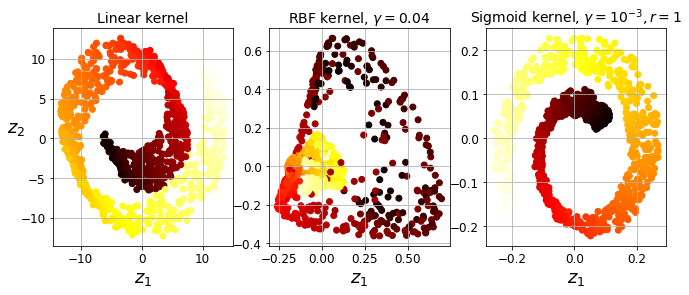

In [52]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression())
])

param_grid = [{
    "kpca__gamma" : np.linspace(0.03, 0.05, 10),
    "kpca__kernel" : ['rbf', 'sigmoid']
}]

grid_search =GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [50]:
# 가장 좋은 커널과 하이퍼파라미터
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [55]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [56]:
# 재구성 원상 오차 계산

from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

32.786308795766125

### 8.5 LLE

In [57]:
from sklearn.manifold import LocallyLinearEmbedding

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

#### 다른 차원 축소 기법

In [58]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

In [59]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [60]:
from sklearn.manifold import TSNE
import warnings; warnings.filterwarnings('ignore')

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

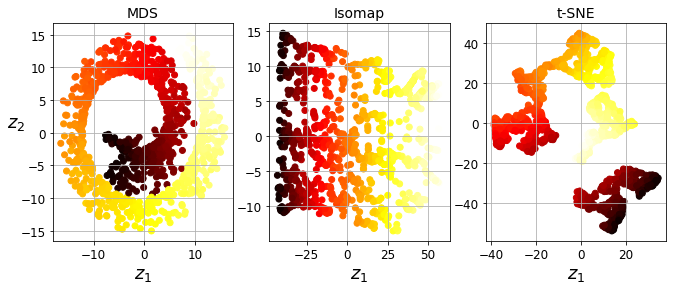

In [62]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()